Test image reconstruction to sinogram

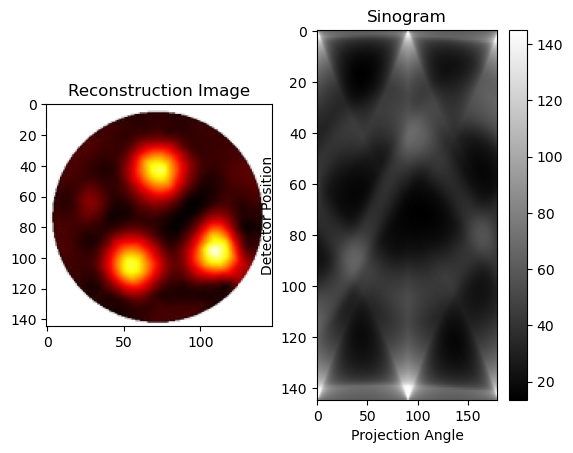

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon
from skimage.color import rgba2rgb, rgb2gray

def read_image(file_path):
    # you may need to adjust this based on your image loading requirements
    image = plt.imread(file_path)
    return image

def generate_sinogram(image):
    # convert RGBA to RGB and then to grayscale
    rgb_image = rgba2rgb(image)
    gray_image = rgb2gray(rgb_image)
    
    # use the radon transform from skimage for simplicity
    sinogram = radon(gray_image)

    return sinogram

def plot_sinogram(sinogram):
    plt.imshow(sinogram, cmap='gray', aspect='auto')
    plt.title('Sinogram')
    plt.xlabel('Projection Angle')
    plt.ylabel('Detector Position')
    plt.colorbar()
    plt.show()

def main():
    image_path = '/home/hinata/code/fyp/images/1_cropped/16sd-mua.png'
    
    reconstruction_image = read_image(image_path)

    sinogram = generate_sinogram(reconstruction_image)

    # display the original image and sinogram
    plt.subplot(1, 2, 1)
    plt.imshow(reconstruction_image)
    plt.title('Reconstruction Image')

    plt.subplot(1, 2, 2)
    plot_sinogram(sinogram)

    plt.show()

if __name__ == "__main__":
    main()


takes in reconstructed image and generates the sinogram and saves it to folder

In [ ]:
import os
import numpy as np
import cv2
import imageio

def read_image(file_path):
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    return image

def generate_sinogram(image):
    num_angles = 180
    sinogram = np.zeros((image.shape[0], num_angles), dtype=np.float32)

    for angle in range(num_angles):
        rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), angle, 1)
        rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]), flags=cv2.INTER_LINEAR)
        sinogram[:, angle] = np.sum(rotated_image, axis=0)

    return sinogram

def save_sinogram(sinogram_normalized, save_path):
    imageio.imsave(save_path, sinogram_normalized.astype(np.uint8))

def main():
    input_folder = '/home/hinata/code/fyp/images/ml_images/rec/16_noise_img'
    output_folder = '/home/hinata/code/fyp/images/ml_images/rec/16_noise_sino'

    # ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(input_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(input_folder, filename)
            sinogram_save_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_16sinogram.png")

            # read the image
            reconstruction_image = read_image(image_path)

            # generate the sinogram
            sinogram_normalized = generate_sinogram(reconstruction_image)

            # normalise the sinogram
            sinogram_normalized = (sinogram_normalized - np.min(sinogram_normalized)) / (np.max(sinogram_normalized) - np.min(sinogram_normalized)) * 255

            save_sinogram(sinogram_normalized, sinogram_save_path)

    print("Sinograms generated and saved.")

if __name__ == "__main__":
    main()
